In [31]:
from pathlib import Path
import re as re
import pandas as pd
import numpy 
# file_path = Path(__file__).resolve()
# ROOT = file_path.parent.parent.parent
# DATA_PATH = ROOT / "data"
# AGREEMENT_PATH = DATA_PATH / "raw/coprus/agreement.csv.txt"

AGREEMENT_PATH = "/home/callebalik/clinical_NLP_SE/data/raw/corpus/agreement.csv.txt"

In [108]:
import re as re
df = pd.read_csv(AGREEMENT_PATH)
df = df[["Document", "Position", "Annotator", "annotator1"]]
# df.iloc[:,0].str.extract(r'(\d)(?=.\w+)')

# Add document nr
df['Doc Nr'] = [re.search(r'(\d)(?=.\w+)', x).group() if re.search(r'(\w+)(?=\d.\w+)', x).group() == 'chart' else (int(re.search(r'(\d)(?=.\w+)', x).group())+5)for x in df['Document']]

df = df[["Doc Nr", "Position", "Annotator", "annotator1"]]

In [113]:
# df = df.drop(df[df.annotator1 == "NaN"].index)
# df = (df[df["annotator1"].isnull()])
not_null=df.loc[(df.annotator1.notnull()) & (df.Annotator.notnull())]

,Doc Nr,Position,Annotator,annotator1
0,1,14-20 [Dyspné],SYM,SYM
1,1,70-73 [DM2],SYM,DIS
2,1,92-101 [hypertoni],SYM,DIS
3,1,201-207 [andnöd],SYM,SYM
5,1,253-255 [Ej],NEG,NEG
...,...,...,...,...
289,10,1227-1237 [Lungemboli],FND,DIS
290,10,1270-1280 [Lungemboli],FND,DIS
291,10,1293-1309 [andningspåverkan],FND,FND
292,10,1314-1336 [hemodynamisk påverkan.],FND,FND


In [133]:
a1 = [x for x in not_null["annotator1"]]
a2 = [x for x in not_null["Annotator"]]

In [147]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

y_true = ["SYM", 0, 2, 2, 0, 1]
y_pred = ["SYM", 0, 2, 2, 0, 2]
print(f"Cohen Kappa {cohen_kappa_score(a1, a2)}")
print("--------")
target_names = ['class 0', 'class 1', 'class 2', "class 3"]
print(classification_report(a1, a2, target_names=None)) 

Cohen Kappa 0.7197316990783187
--------
              precision    recall  f1-score   support

         DIS       1.00      0.42      0.60        40
         FND       0.76      0.82      0.79        93
         NEG       0.96      1.00      0.98        70
         SYM       0.60      0.79      0.68        39

    accuracy                           0.80       242
   macro avg       0.83      0.76      0.76       242
weighted avg       0.83      0.80      0.79       242



In [ ]:
print(confusion_matrix(a1, a2, normalize="all"))

<AxesSubplot:>

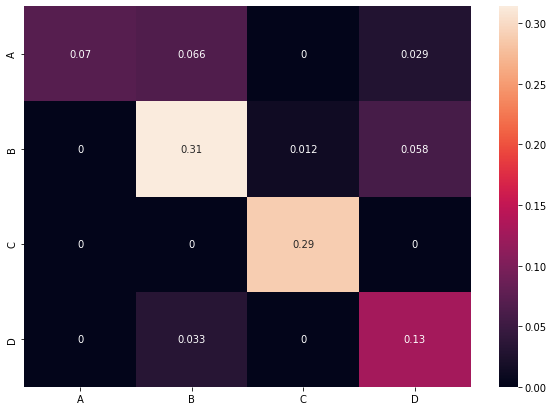

In [143]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[33,2,0,0,0,0,0,0,0,1,3], 
        [3,31,0,0,0,0,0,0,0,0,0], 
        [0,4,41,0,0,0,0,0,0,0,1], 
        [0,1,0,30,0,6,0,0,0,0,1], 
        [0,0,0,0,38,10,0,0,0,0,0], 
        [0,0,0,3,1,39,0,0,0,0,4], 
        [0,2,2,0,4,1,31,0,0,0,2],
        [0,1,0,0,0,0,0,36,0,2,0], 
        [0,0,0,0,0,0,1,5,37,5,1], 
        [3,0,0,0,0,0,0,0,0,39,0], 
        [0,0,0,0,0,0,0,0,0,0,38]]
array = confusion_matrix(a1, a2, normalize="all")
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)